# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

In [4]:
# set up lists to hold reponse info
cities_found = []
lat = []
lon = []
temp = []
humid = []
cloud = []
wind = []
date = []
country = []

# Loop through the list of cities and perform a request for data on each
#Try/Except

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_found.append(city)   
        print(f"City Identified {city}")
    except:
        print(f"City NOT Found {city}")

City Identified norman wells
City Identified yellowknife
City NOT Found illoqqortoormiut
City Identified labuhan
City Identified punta arenas
City Identified barrow
City Identified khatanga
City Identified mataura
City Identified klaksvik
City Identified hermanus
City Identified mahebourg
City Identified sorland
City Identified cherskiy
City Identified bredasdorp
City Identified kapaa
City Identified bengkulu
City Identified port alfred
City Identified castro
City Identified busselton
City Identified port elizabeth
City Identified honiara
City Identified saint-philippe
City Identified luba
City Identified barkly west
City Identified schwandorf
City Identified khandyga
City Identified tiksi
City Identified belyy yar
City Identified yashkul
City Identified mnogovershinnyy
City Identified cervo
City Identified sao gabriel da cachoeira
City Identified ushuaia
City Identified kavieng
City Identified dudinka
City Identified souillac
City Identified ginir
City Identified dukat
City Identified

City Identified calvinia
City Identified eenhana
City Identified matucana
City Identified sao joao dos patos
City Identified monywa
City NOT Found lolua
City Identified kotli loharan
City Identified oliveira
City Identified ozernovskiy
City Identified takaka
City Identified pepel
City Identified dinanagar
City Identified hualmay
City Identified korla
City Identified sitrah
City Identified muromtsevo
City Identified cayenne
City Identified huarmey
City Identified pangkalanbuun
City Identified ashtian
City Identified champerico
City Identified seoul
City Identified pisco
City Identified kaukauna
City Identified nouakchott
City Identified eyl
City Identified melbu
City NOT Found sansai
City Identified muana
City Identified high rock
City Identified la ronge
City Identified walvis bay
City Identified arica
City NOT Found suao
City Identified plettenberg bay
City Identified grand gaube
City Identified syracuse
City Identified upata
City Identified swellendam
City Identified safaga
City Iden

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data = pd.DataFrame({
    'City': cities_found,
    'Country': country,   
    'Temp': temp,
    'Humidity': humid,
    'Cloudiness': cloud,
    'Wind Speed': wind,
    'Latitude': lat,
    'Longitude': lon,
    'Date': date
    
})

In [6]:
weather_data.to_csv("cities_weather2.csv")

weather_data

,City,Country,Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Date
0,norman wells,CA,30.20,92,75,2.24,65.28,-126.83,1602427127
1,yellowknife,CA,35.01,100,90,9.17,62.46,-114.35,1602426964
2,labuhan,ID,82.71,75,56,6.73,-6.88,112.21,1602427127
3,punta arenas,CL,51.80,62,20,38.03,-53.15,-70.92,1602427127
4,barrow,US,24.80,68,90,19.46,71.29,-156.79,1602427127
...,...,...,...,...,...,...,...,...,...
543,kollam,IN,82.40,88,75,2.24,8.88,76.60,1602427182
544,shaowu,CN,65.50,82,0,2.57,27.34,117.48,1602427182
545,hofn,IS,44.60,93,90,12.75,64.25,-15.21,1602427182
546,sapernoye,RU,53.01,93,100,4.99,60.72,29.95,1602427182


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#weather_data.describe()

In [8]:
#Get the indices of cities that have humidity over 100%.

high_humidity = weather_data [(weather_data['Humidity'] > 100)].index

high_humidity

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


In [11]:
#Cannot figure this part out

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [12]:
#Set max date as "runDate" for graph titles
endRunDate = weather_data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

## Latitude vs. Temperature Plot

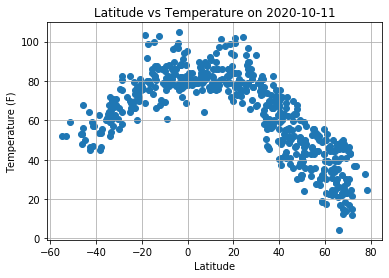

In [14]:
#set data to plot
x = weather_data["Latitude"]
y = weather_data["Temp"] #Getting weird error that there is something wrong with temperature
plt.scatter(x,y)

#add gridlines
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

#export as png
plt.savefig(f'Latitude vs Temperature on {runDate}.png')

#display plot
plt.show()

## Latitude vs. Humidity Plot

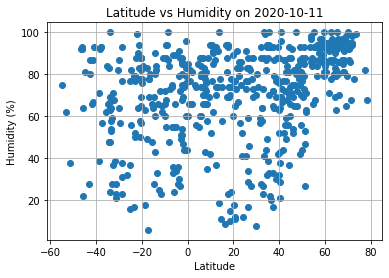

In [15]:
#set data to plot
h = weather_data["Humidity"]
plt.scatter(x,h)

#add gridlines
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Humidity on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#export as png
plt.savefig(f'Latitude vs Humidity on {runDate}.png')

#display plot
plt.show()

## Latitude vs. Cloudiness Plot

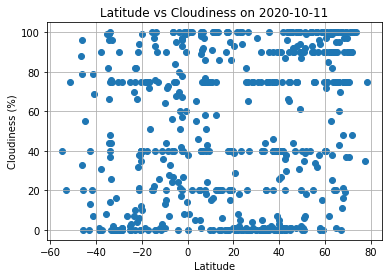

In [16]:
#set data to plot
c = weather_data["Cloudiness"]
plt.scatter(x,c)

#add gridlines
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#export as png
plt.savefig(f'Latitude vs Cloudiness on {runDate}.png')

#display plot
plt.show()

## Latitude vs. Wind Speed Plot

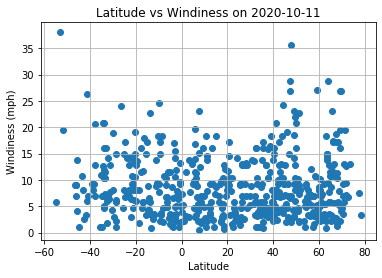

In [17]:
#set data to plot
w = weather_data["Wind Speed"]
plt.scatter(x,w)

#add gridlines
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Windiness on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Windiness (mph)")

#export as png
plt.savefig(f'Latitude vs Windiness on {runDate}.png')

#display plot
plt.show()

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots

In [19]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = weather_data.loc[weather_data["Latitude"] > 0]
south_hemi = weather_data.loc[weather_data["Latitude"] < 0]

#north_hemi
#south_hemi

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

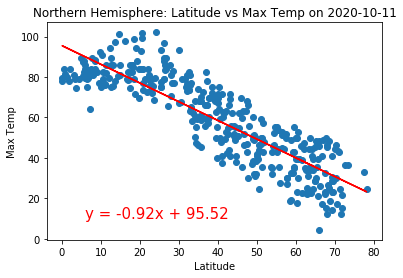

In [20]:
x_values = north_hemi['Latitude']
y_values = north_hemi['Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Northern Hemisphere: Latitude vs Max Temp on {runDate}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

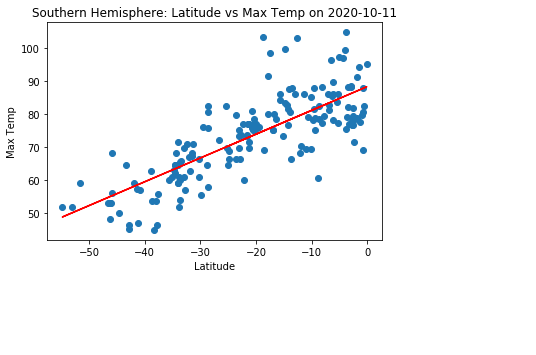

In [22]:
x_values = south_hemi['Latitude']
y_values = south_hemi['Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Southern Hemisphere: Latitude vs Max Temp on {runDate}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

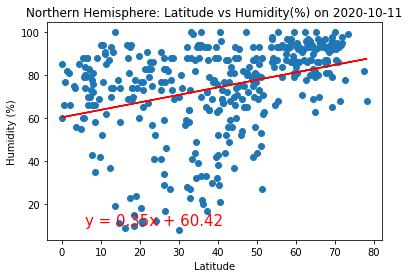

In [23]:
x_values = north_hemi['Latitude']
y_values = north_hemi['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Northern Hemisphere: Latitude vs Humidity(%) on {runDate}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

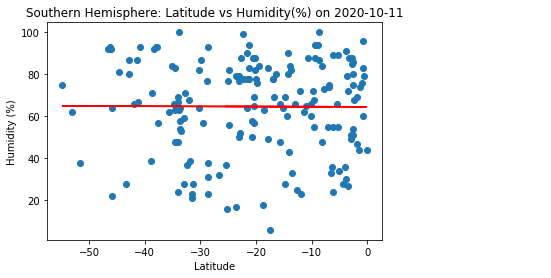

In [24]:
x_values = south_hemi['Latitude']
y_values = south_hemi['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Southern Hemisphere: Latitude vs Humidity(%) on {runDate}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

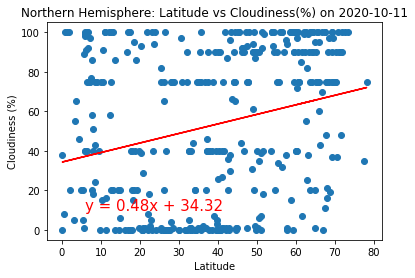

In [25]:
x_values = north_hemi['Latitude']
y_values = north_hemi['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Northern Hemisphere: Latitude vs Cloudiness(%) on {runDate}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

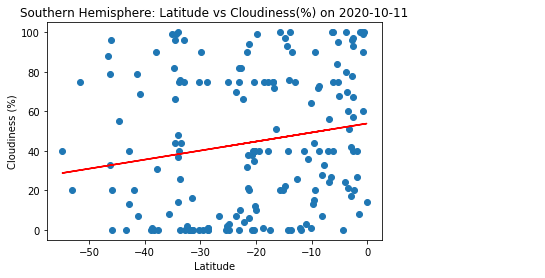

In [26]:
x_values = south_hemi['Latitude']
y_values = south_hemi['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Southern Hemisphere: Latitude vs Cloudiness(%) on {runDate}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

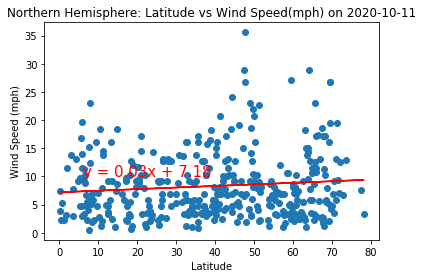

In [27]:
x_values = north_hemi['Latitude']
y_values = north_hemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Northern Hemisphere: Latitude vs Wind Speed(mph) on {runDate}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

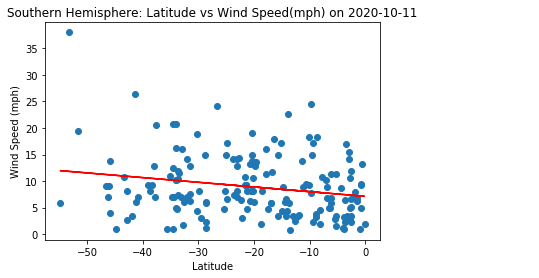

In [28]:
x_values = south_hemi['Latitude']
y_values = south_hemi['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Southern Hemisphere: Latitude vs Wind Speed(mph) on {runDate}")
plt.show()